## Moving Average

A moving average, also called a rolling or running average, is used to analyze the time-series data by calculating averages of different subsets of the complete dataset. Since it involves taking the average of the dataset over time, it is also called a moving mean (MM) or rolling mean.

There are various ways in which the rolling average can be calculated, but one such way is to take a fixed subset from a complete series of numbers. The first moving average is calculated by averaging the first fixed subset of numbers, and then the subset is changed by moving forward to the next fixed subset (including the future value in the subgroup while excluding the previous number from the series).

The moving average is mostly used with time series data to capture the short-term fluctuations while focusing on longer trends.

A few examples of time series data can be stock prices, weather reports, air quality, gross domestic product, employment, etc.

In general, the moving average smoothens the data.

Moving average is a backbone to many algorithms, and one such algorithm is Autoregressive Integrated Moving Average Model (ARIMA), which uses moving averages to make time series data predictions.

There are various types of moving averages:

### 1.Simple Moving Average (SMA): 
Simple Moving Average (SMA) uses a sliding window to take the average over a set number of time periods. It is an equally weighted mean of the previous n data.

To understand SMA further, lets take an example, a sequence of n values:

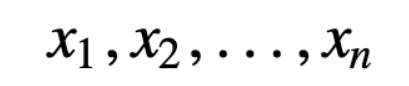

then the equally weighted rolling average for n data points will be essentially the mean of the previous M data-points, where M is the size of the sliding window:

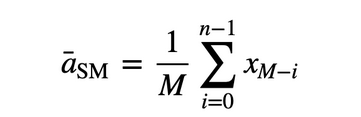

Similarly, for calculating succeeding rolling average values, a new value will be added into the sum, and the previous time period value will be dropped out, since you have the average of previous time periods so full summation each time is not required:

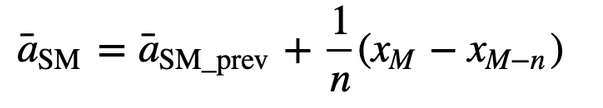

### Cumulative Moving Average (CMA):
Unlike simple moving average which drops the oldest observation as the new one gets added, cumulative moving average considers all prior observations. CMA is not a very good technique for analyzing trends and smoothing out the data. The reason being, it averages out all of the previous data up until the current data point, so an equally weighted average of the sequence of n values: 
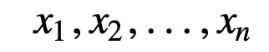

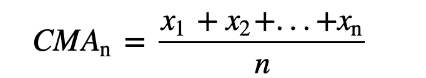

Similarly, to update cumulative average for every new value that comes can be calculated using the below formula: 
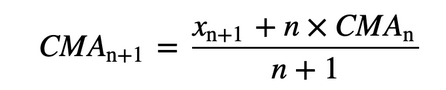

### Exponential Moving Average (EMA):
Unlike SMA and CMA, exponential moving average gives more weight to the recent prices and as a result of which, it can be a better model or better capture the movement of the trend in a faster way. EMA's reaction is directly proportional to the pattern of the data.

Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest price changes as compared to SMAs, which makes the results from EMAs more timely and hence EMA is more preferred over other techniques.

Enough of theory, right? Let's jump to the practical implementation of the moving average.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df=pd.read_csv("../Data/temperature.csv",parse_dates=["datetime"])

In [29]:
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [30]:
df.shape

(45253, 37)

In [31]:
df.isna().sum()

datetime               0
Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [32]:
df.dropna(inplace=True)

In [33]:
df.isna().sum()

datetime             0
Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

In [40]:
df_boston = pd.DataFrame(df.iloc[:,[0,-7]])

In [41]:
df_boston.head()

,datetime,Boston
1,2012-10-01 13:00:00,287.170000
2,2012-10-01 14:00:00,287.186092
3,2012-10-01 15:00:00,287.231672
4,2012-10-01 16:00:00,287.277251
5,2012-10-01 17:00:00,287.322831


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44430 entries, 1 to 44460
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           44430 non-null  datetime64[ns]
 1   Vancouver          44430 non-null  float64       
 2   Portland           44430 non-null  float64       
 3   San Francisco      44430 non-null  float64       
 4   Seattle            44430 non-null  float64       
 5   Los Angeles        44430 non-null  float64       
 6   San Diego          44430 non-null  float64       
 7   Las Vegas          44430 non-null  float64       
 8   Phoenix            44430 non-null  float64       
 9   Albuquerque        44430 non-null  float64       
 10  Denver             44430 non-null  float64       
 11  San Antonio        44430 non-null  float64       
 12  Dallas             44430 non-null  float64       
 13  Houston            44430 non-null  float64       
 14  Kansas

In [43]:
df_boston['SMA_3'] = df_boston["Boston"].rolling(window=3).mean()

In [66]:
df_boston.iloc[:,:3]

,datetime,Boston,SMA_3
1,2012-10-01 13:00:00,287.170000,NaN
2,2012-10-01 14:00:00,287.186092,NaN
3,2012-10-01 15:00:00,287.231672,287.195921
4,2012-10-01 16:00:00,287.277251,287.231672
5,2012-10-01 17:00:00,287.322831,287.277251
...,...,...,...
44456,2017-10-27 20:00:00,289.740000,289.153333
44457,2017-10-27 21:00:00,289.080000,289.353333
44458,2017-10-27 22:00:00,288.090000,288.970000
44459,2017-10-27 23:00:00,284.940000,287.370000


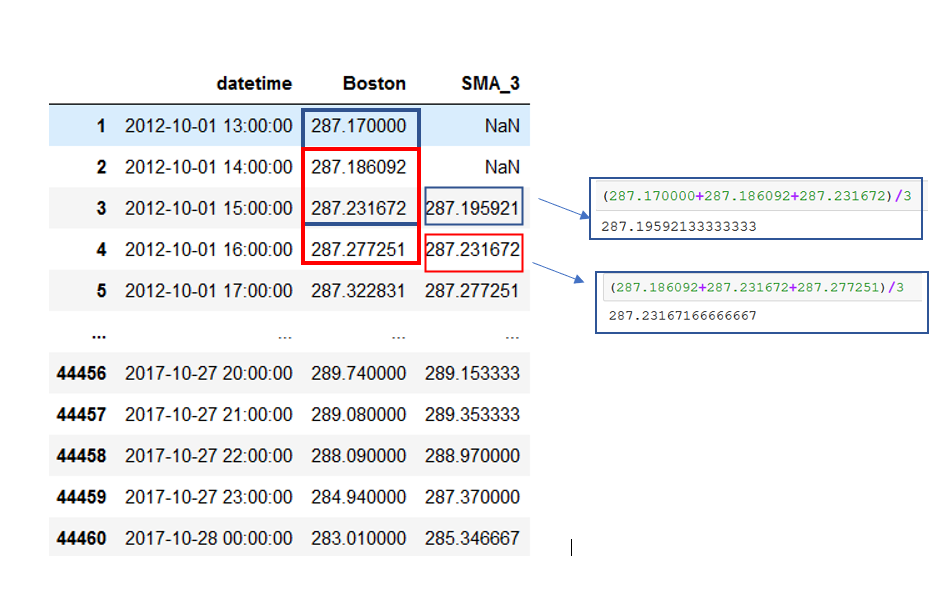

In [68]:
(287.186092+287.231672+287.277251)/3

287.23167166666667

In [46]:
df_boston['SMA_4'] = df_boston["Boston"].rolling(window=4).mean()

In [47]:
df_boston.head()

,datetime,Boston,SMA_3,SMA_4
1,2012-10-01 13:00:00,287.170000,NaN,NaN
2,2012-10-01 14:00:00,287.186092,NaN,NaN
3,2012-10-01 15:00:00,287.231672,287.195921,NaN
4,2012-10-01 16:00:00,287.277251,287.231672,287.216254
5,2012-10-01 17:00:00,287.322831,287.277251,287.254461


In [48]:
df_b=df_boston.head(100)

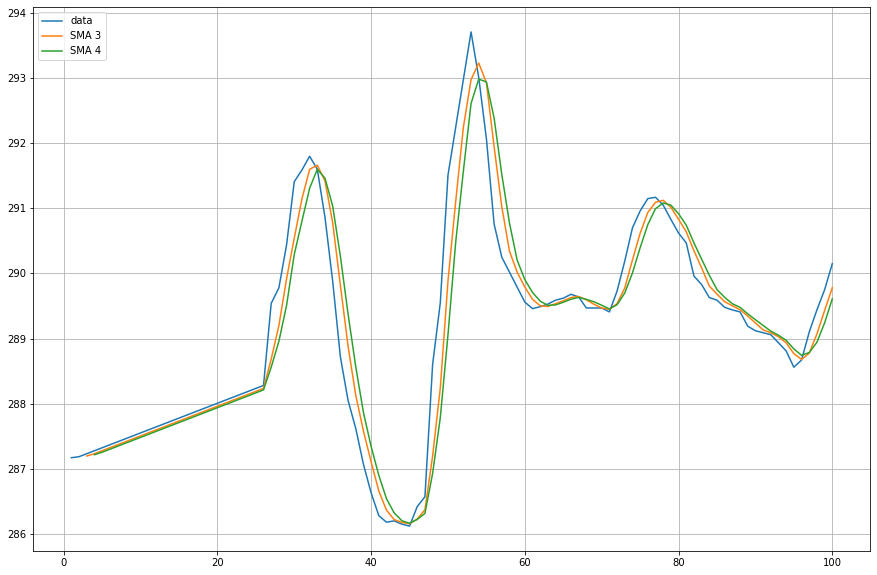

In [49]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_b['Boston'],label='data')
plt.plot(df_b['SMA_3'],label='SMA 3')
plt.plot(df_b['SMA_4'],label='SMA 4')
plt.legend(loc=2)

you will use the pandas expanding method fo find the cumulative average of the above data. If you recall from the introduction, unlike the simple moving average, the cumulative moving average considers all of the preceding values when calculating the average.

In [50]:
df_boston['CMA_4'] = df_boston["Boston"].expanding(min_periods=4).mean()

In [51]:
df_boston.head()

,datetime,Boston,SMA_3,SMA_4,CMA_4
1,2012-10-01 13:00:00,287.170000,NaN,NaN,NaN
2,2012-10-01 14:00:00,287.186092,NaN,NaN,NaN
3,2012-10-01 15:00:00,287.231672,287.195921,NaN,NaN
4,2012-10-01 16:00:00,287.277251,287.231672,287.216254,287.216254
5,2012-10-01 17:00:00,287.322831,287.277251,287.254461,287.237569


In [70]:
df_boston.iloc[:,[0,1,-2]]

,datetime,Boston,CMA_4
1,2012-10-01 13:00:00,287.170000,NaN
2,2012-10-01 14:00:00,287.186092,NaN
3,2012-10-01 15:00:00,287.231672,NaN
4,2012-10-01 16:00:00,287.277251,287.216254
5,2012-10-01 17:00:00,287.322831,287.237569
...,...,...,...
44456,2017-10-27 20:00:00,289.740000,283.845472
44457,2017-10-27 21:00:00,289.080000,283.845590
44458,2017-10-27 22:00:00,288.090000,283.845686
44459,2017-10-27 23:00:00,284.940000,283.845710


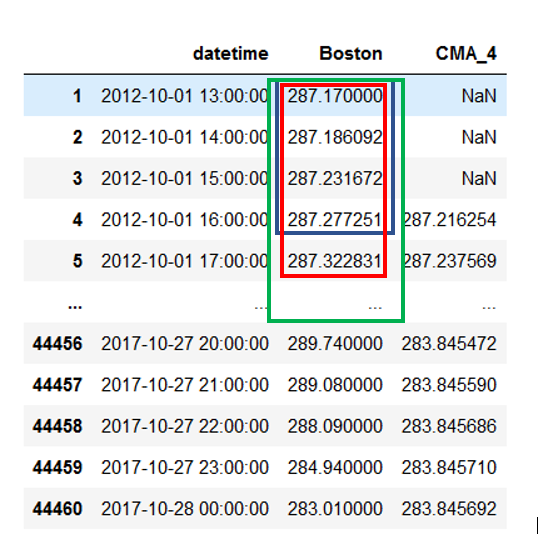

In [55]:
df_b=df_boston.head(100)

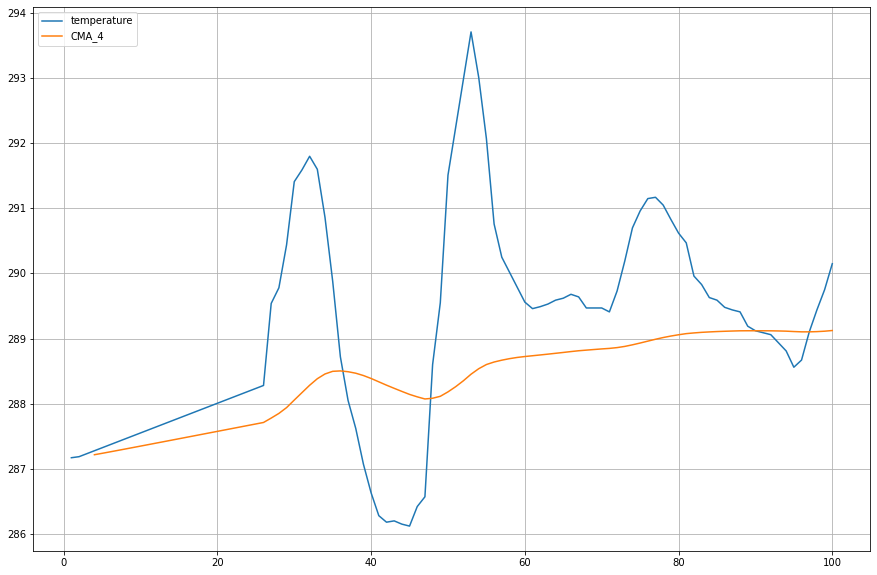

In [56]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_b['Boston'],label='temperature')
plt.plot(df_b['CMA_4'],label='CMA_4')
plt.legend(loc=2)

In [ ]:
#Exponential Moving Average

In [57]:
df_boston['EMA'] = df_boston["Boston"].ewm(span=40,adjust=False).mean()

Divide by decaying adjustment factor in beginning periods to account for imbalance in relative weightings (viewing EWMA as a moving average).

    When adjust=True (default), the EW function is calculated using weights wi=(1−α)i

. For example, the EW moving average of the series [x0,x1,...,xt] would be:

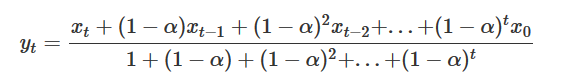

    When adjust=False, the exponentially weighted function is calculated recursively:
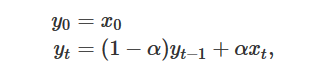

In [58]:
df_boston.head()

,datetime,Boston,SMA_3,SMA_4,CMA_4,EMA
1,2012-10-01 13:00:00,287.170000,NaN,NaN,NaN,287.170000
2,2012-10-01 14:00:00,287.186092,NaN,NaN,NaN,287.170785
3,2012-10-01 15:00:00,287.231672,287.195921,NaN,NaN,287.173755
4,2012-10-01 16:00:00,287.277251,287.231672,287.216254,287.216254,287.178804
5,2012-10-01 17:00:00,287.322831,287.277251,287.254461,287.237569,287.185829


In [62]:
df_b=df_boston

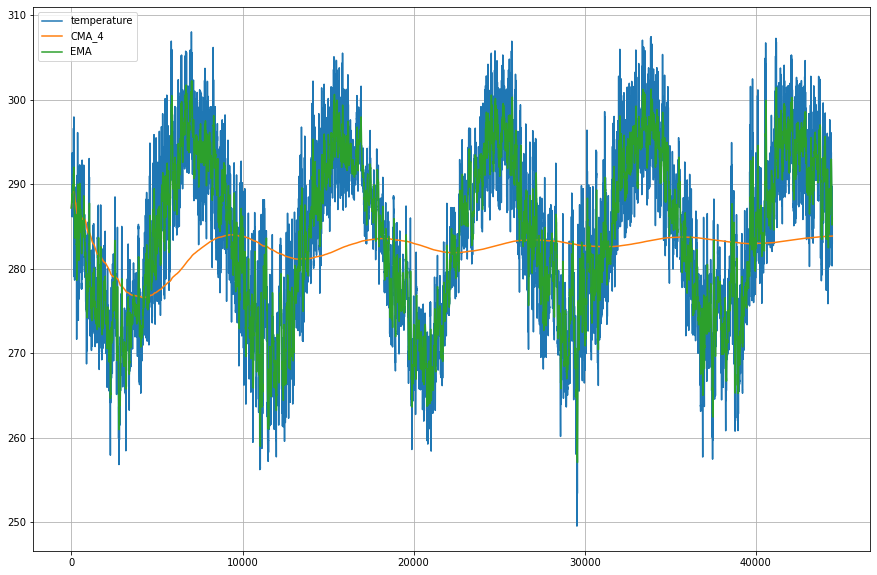

In [63]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_b['Boston'],label='temperature')
plt.plot(df_b['CMA_4'],label='CMA_4')
plt.plot(df_b['EMA'],label='EMA')
plt.legend(loc=2)

Exponential Moving Average (EMA) does a superb job in capturing the pattern of the data while the Cumulative Moving Average (CMA) lacks by a considerable margin.